# Heart Diseases Prediction

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Heart Diseases: What are the indicators?</div>

<br> </br>
<div>    

<img src="https://images2.minutemediacdn.com/image/upload/c_fill,w_1080,ar_16:9,f_auto,q_auto,g_auto/shape%2Fcover%2Fsport%2F535618-istock-819924240-2470f65174198a2b48b33619995f99ad.jpg" width="550/">    
</div>

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 12px;border-style: solid;border-color: dark green;"><p><b><a href="https://www.mentalfloss.com/article/535618/super-ekg-could-diagnose-heart-disease-90-seconds" target="">Image source</a></b></p></div>


# 0. **Introduction** <a class="anchor" id="0"></a>
"Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to **heart failure** and **heart attack**." [[Source](https://www.indushealthplus.com/heart-diseases.html)]

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color:#4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>Key facts according to WHO (World Health Organaizations)</b></font> 
<ul>
<li> Cardiovascular diseases (CVDs) are the leading cause of death globally.
<li> An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
<li> Over three quarters of CVD deaths take place in low- and middle-income countries.
<li> Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
<li> Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
<li> It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.                                                                                                                                 
    
</ul>        
</blockquote>

#### **Objectives**
This notebook has two main objectives:
* Explore the heart disease dataset using exploratory data analysis (EDA)
* Exercise with classification algorithms for prediction (modelling) 
---

<a id="top"></a>

Heart disease is one of the leading causes of death worldwide and poses a major challenge to healthcare systems. Early detection and accurate prediction of heart disease risk can play a crucial role in reducing mortality rates and improving patient outcomes. With the help of data-driven techniques, machine learning models can be applied to medical datasets to identify key risk factors and predict the likelihood of heart disease.
This notebook aims to analyze heart disease data and build predictive models that can assist in decision-making for preventive healthcare.

### Objectives
This notebook has two main objectives:

- Explore the heart disease dataset using exploratory data analysis (EDA)
- Exercise with classification algorithms for prediction (modelling)

# 1. Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

In [11]:
#reading data
path= 'heart.csv'
original_df=pd.read_csv(path)
data=original_df.copy()

In [12]:
#show top 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
#shows the datatype of each column
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<b>Note</b>: From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us. We will, in the section below, see a detailed decreption of the features.



In [14]:
#shape the data
df.shape

(303, 14)

## 1.1 Data Dictionary ¶
1. age: age in years
2. sex: sex
- 1 = male
- 0 = female
3. cp: chest pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
- 1 = true;
- 0 = false
7. restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
- 1 = yes
- 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
- 0 = error (in the original dataset 0 maps to NaN's)
- 1 = fixed defect
- 2 = normal
- 3 = reversable defect
14. target (the lable):
- 0 = no disease,
- 1 = disease

### 1.2.1 Drop faulty data¶
Based on our investigation we did above, we will drop 7 rows.

In [15]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


### 1.2.2 Rename columns for the sake of clarity¶
- The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.
- We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)
- <b>Note</b>: I borrowed Rob Harrand's idea of re-naming the columns.

In [17]:
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [20]:
#In sex column checks 0 means female and 1 means male
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

# 0 means typical angina, 1 atypical angina, 2 non-anginal pain, 3 asymptomatic
data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

# 0 lower than 120mg/ml, 1 greater than 120mg/ml
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

# 0 normal, 1 ST-T wave abnormality, 2 left ventricular hypertrophy
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

# 0 no, 1 yes
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

# 0 upsloping, 1 flat, 2 downsloping
data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

# 1 fixed defect, 2 normal, 3 reversable defect
data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'


In [19]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [21]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


### 1.2.3 Grouping Features (by data type)
- As we have seen above there are three datatypes i.e object, int and floats. Let's group them according to type.

In [26]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## 1.3 Exploring Features/Target 
- In this section we'll investigate all the features (including the target) in detail. We will look at the statistical summary when possible and the distributions of some of them as well, starting from the target.

### 1.3.1 Target distribution
- We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

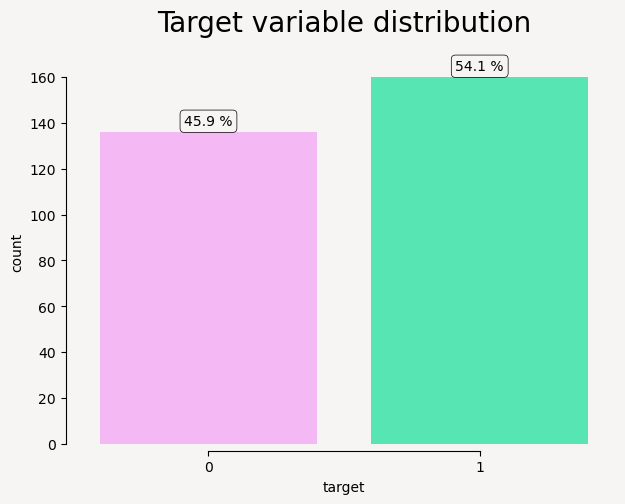

In [24]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### 1.3.2 Numerical Features
Statistical summary

For the numerical features we can apply the handy pandas data.describe() method and get the global statistical summary. Key figures are highlighted below.

In [27]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


<b>Statistical summary of the numerical features</b>

<b>Age</b>:
- The average age in the dataset is 54.5 years
- The oldest is 77 years, whereas the youngest is 29 years old
  
<b>Cholesterol</b>:
- The average registered cholestrol level is 247.15
- Maximum level is 564 and the minimum level is 126.
- Note: According to [6], a healthy cholesterol level is  <200mg/dl
  and usually high level of cholesterol is associated with heart disease.

<b>Resting blood pressure</b>:
- 131 mean, 200 max and 94 min
  
<b>Max heart rate achieved</b>:
- The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.
  
<b>St_depression</b>:
- The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.


Distribution: Density plots

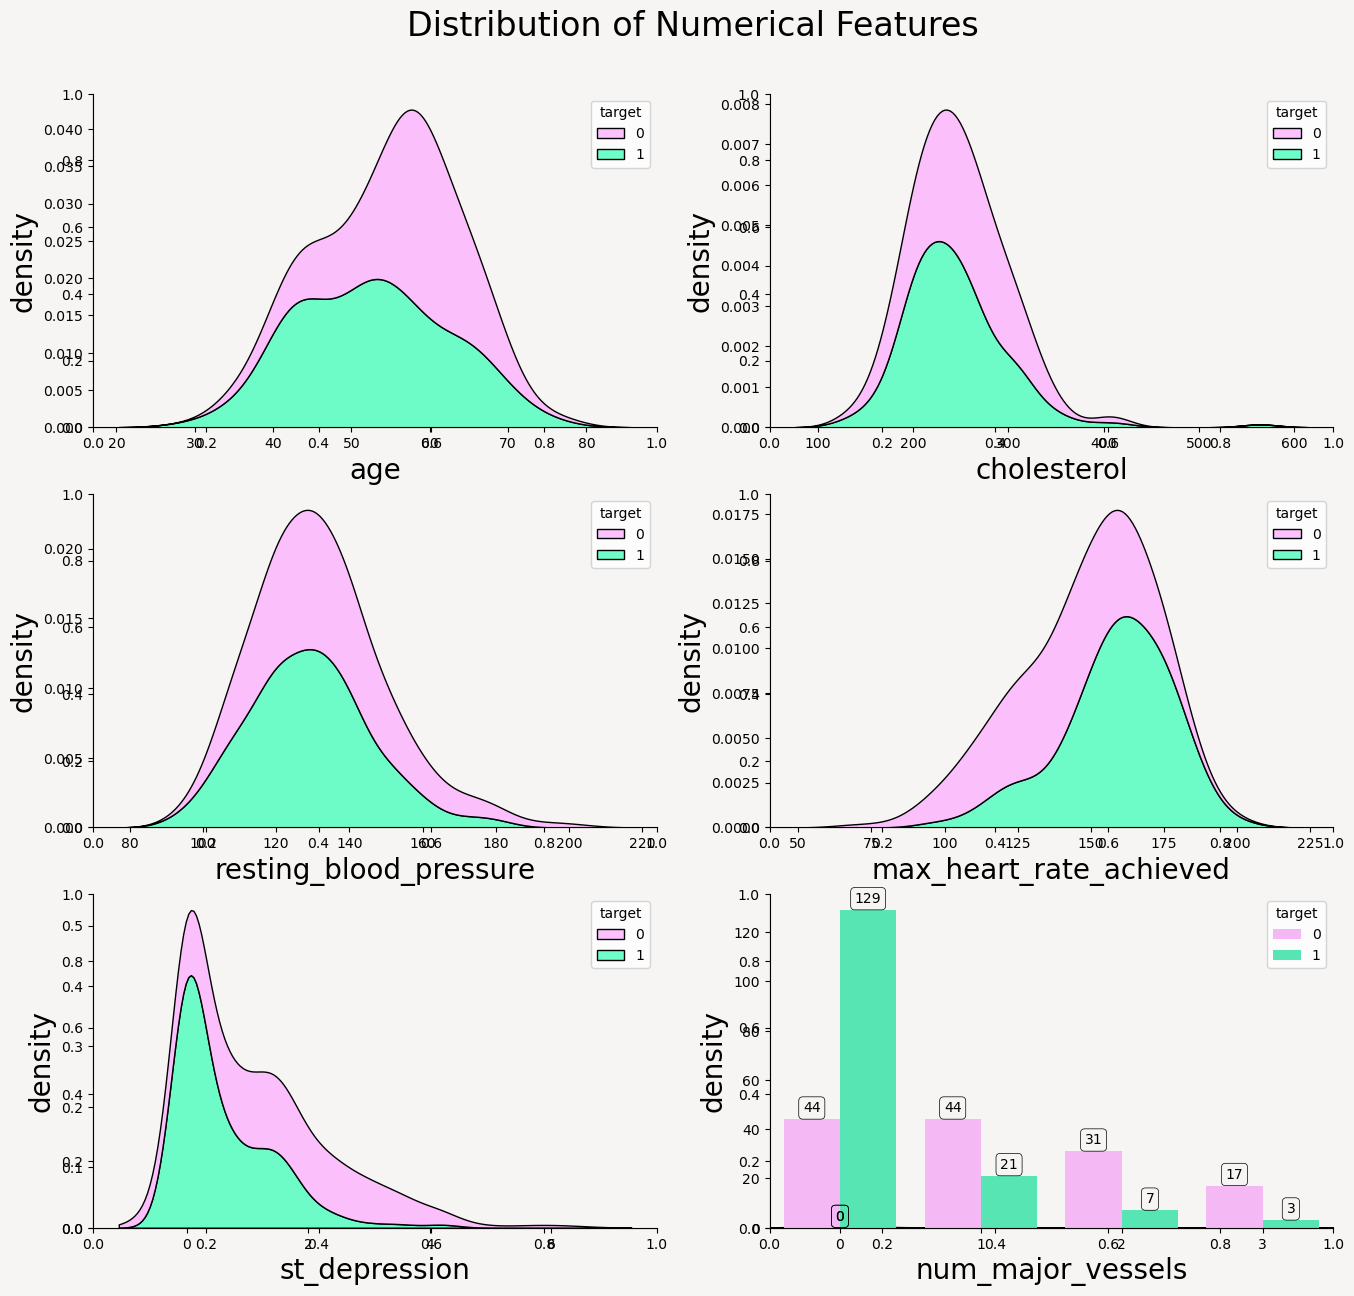

In [28]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);


Pair-plots

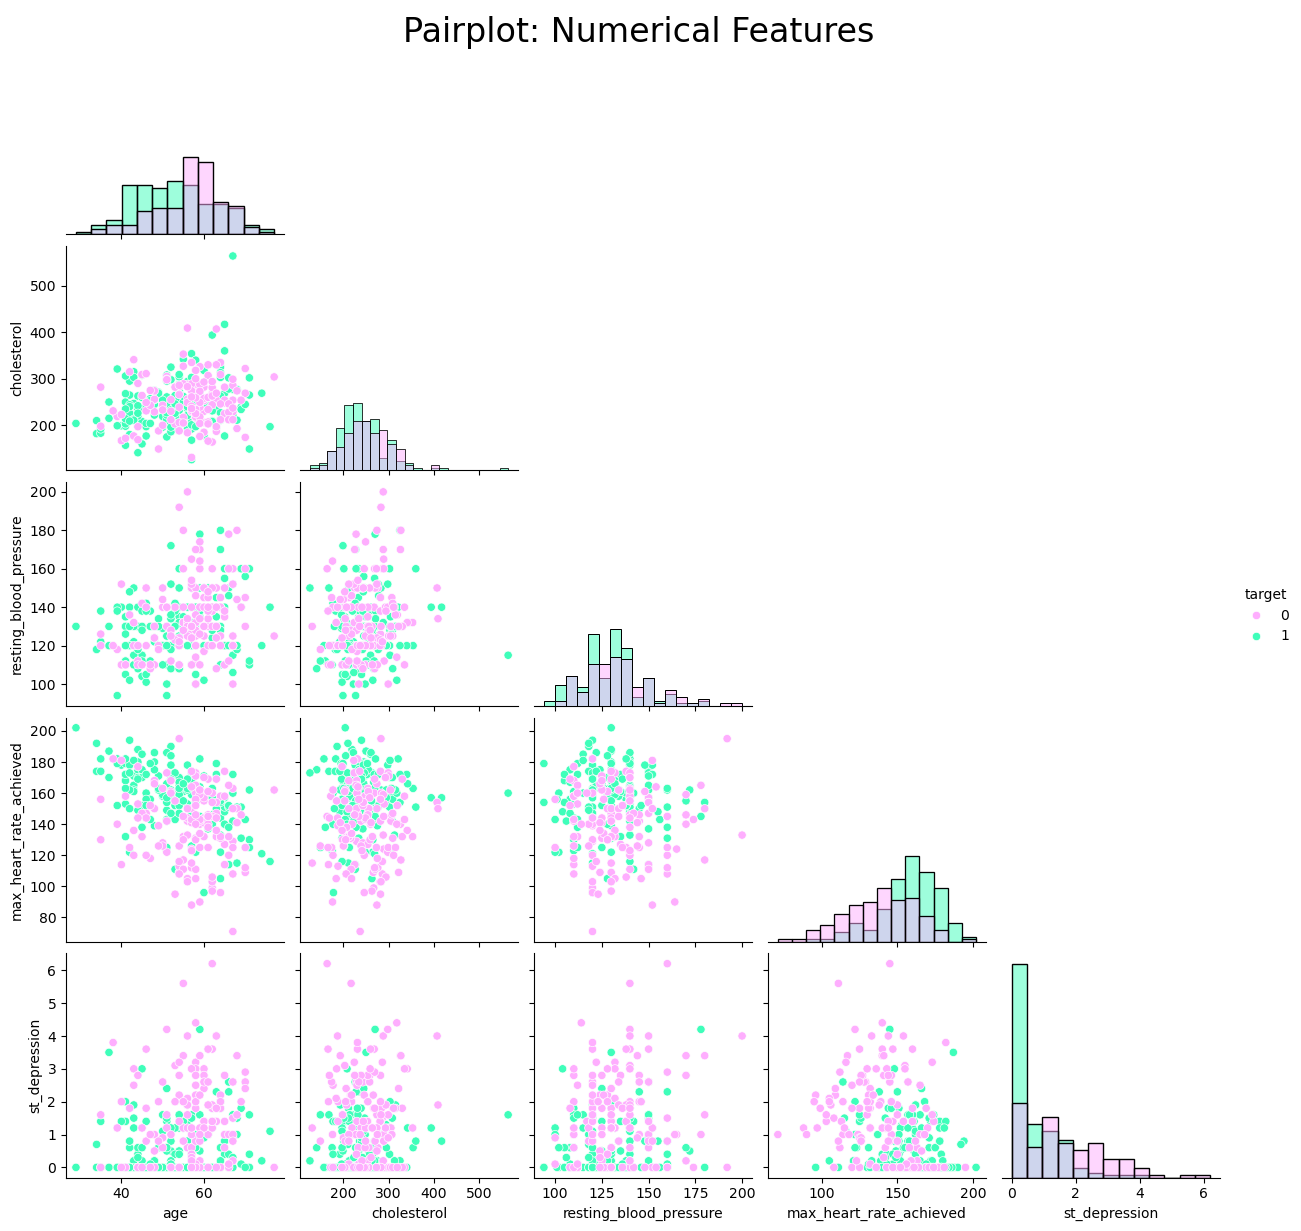

In [29]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

Selected Features

- Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:

- Except maximum_heart_rate_achieved, the others are positively and linearly related with age (albeit a weaker relation with st_depression).
- Younger patients with higher maximum_heart_rate_achieved are more likely to have a heart condition.
- Lower st_depression regardless of age is also likely an indication of a heart disease.

### 1.3.3 Categorical Features¶
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.

<b>Chest Pain</b>:
- More than 75% of the patients experience either typical angina or non-angina chest pain.
- Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.

<b>Resting Electrocardiogram</b>:
- Patients with Left ventricular hypertrophy are the fewest (~1.4%). The rest is almost a 50-50 split between patients with ST-T abnormality and those with normal REC tests.
- ST-T abnormality seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.
<b>ST-Slope</b>:
- Most patients have a downsloping or flat ST-Slope of their REC test.
- downsloping ST-Slopes are a strong indication that a patient might have a heart disease.

<b>Thalassemia</b>:
- Most patients have a normal or reversable defect
- Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.

<b>Fasting blood sugar</b>
- Patients with lower (less than 120mg/ml) fasting blood sugar are the majority in our dataset consisting of ~85% of the sample.
- Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.

<b>Exercise Induced Angina</b>
- Two-third of the patients showed no exercise induced angina.
- 76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.

<b>Sex</b>
- More patients in the sample data are male.
- Females seem to suffer from heart condition more than males.

<b>Distribution: Count plots</b>

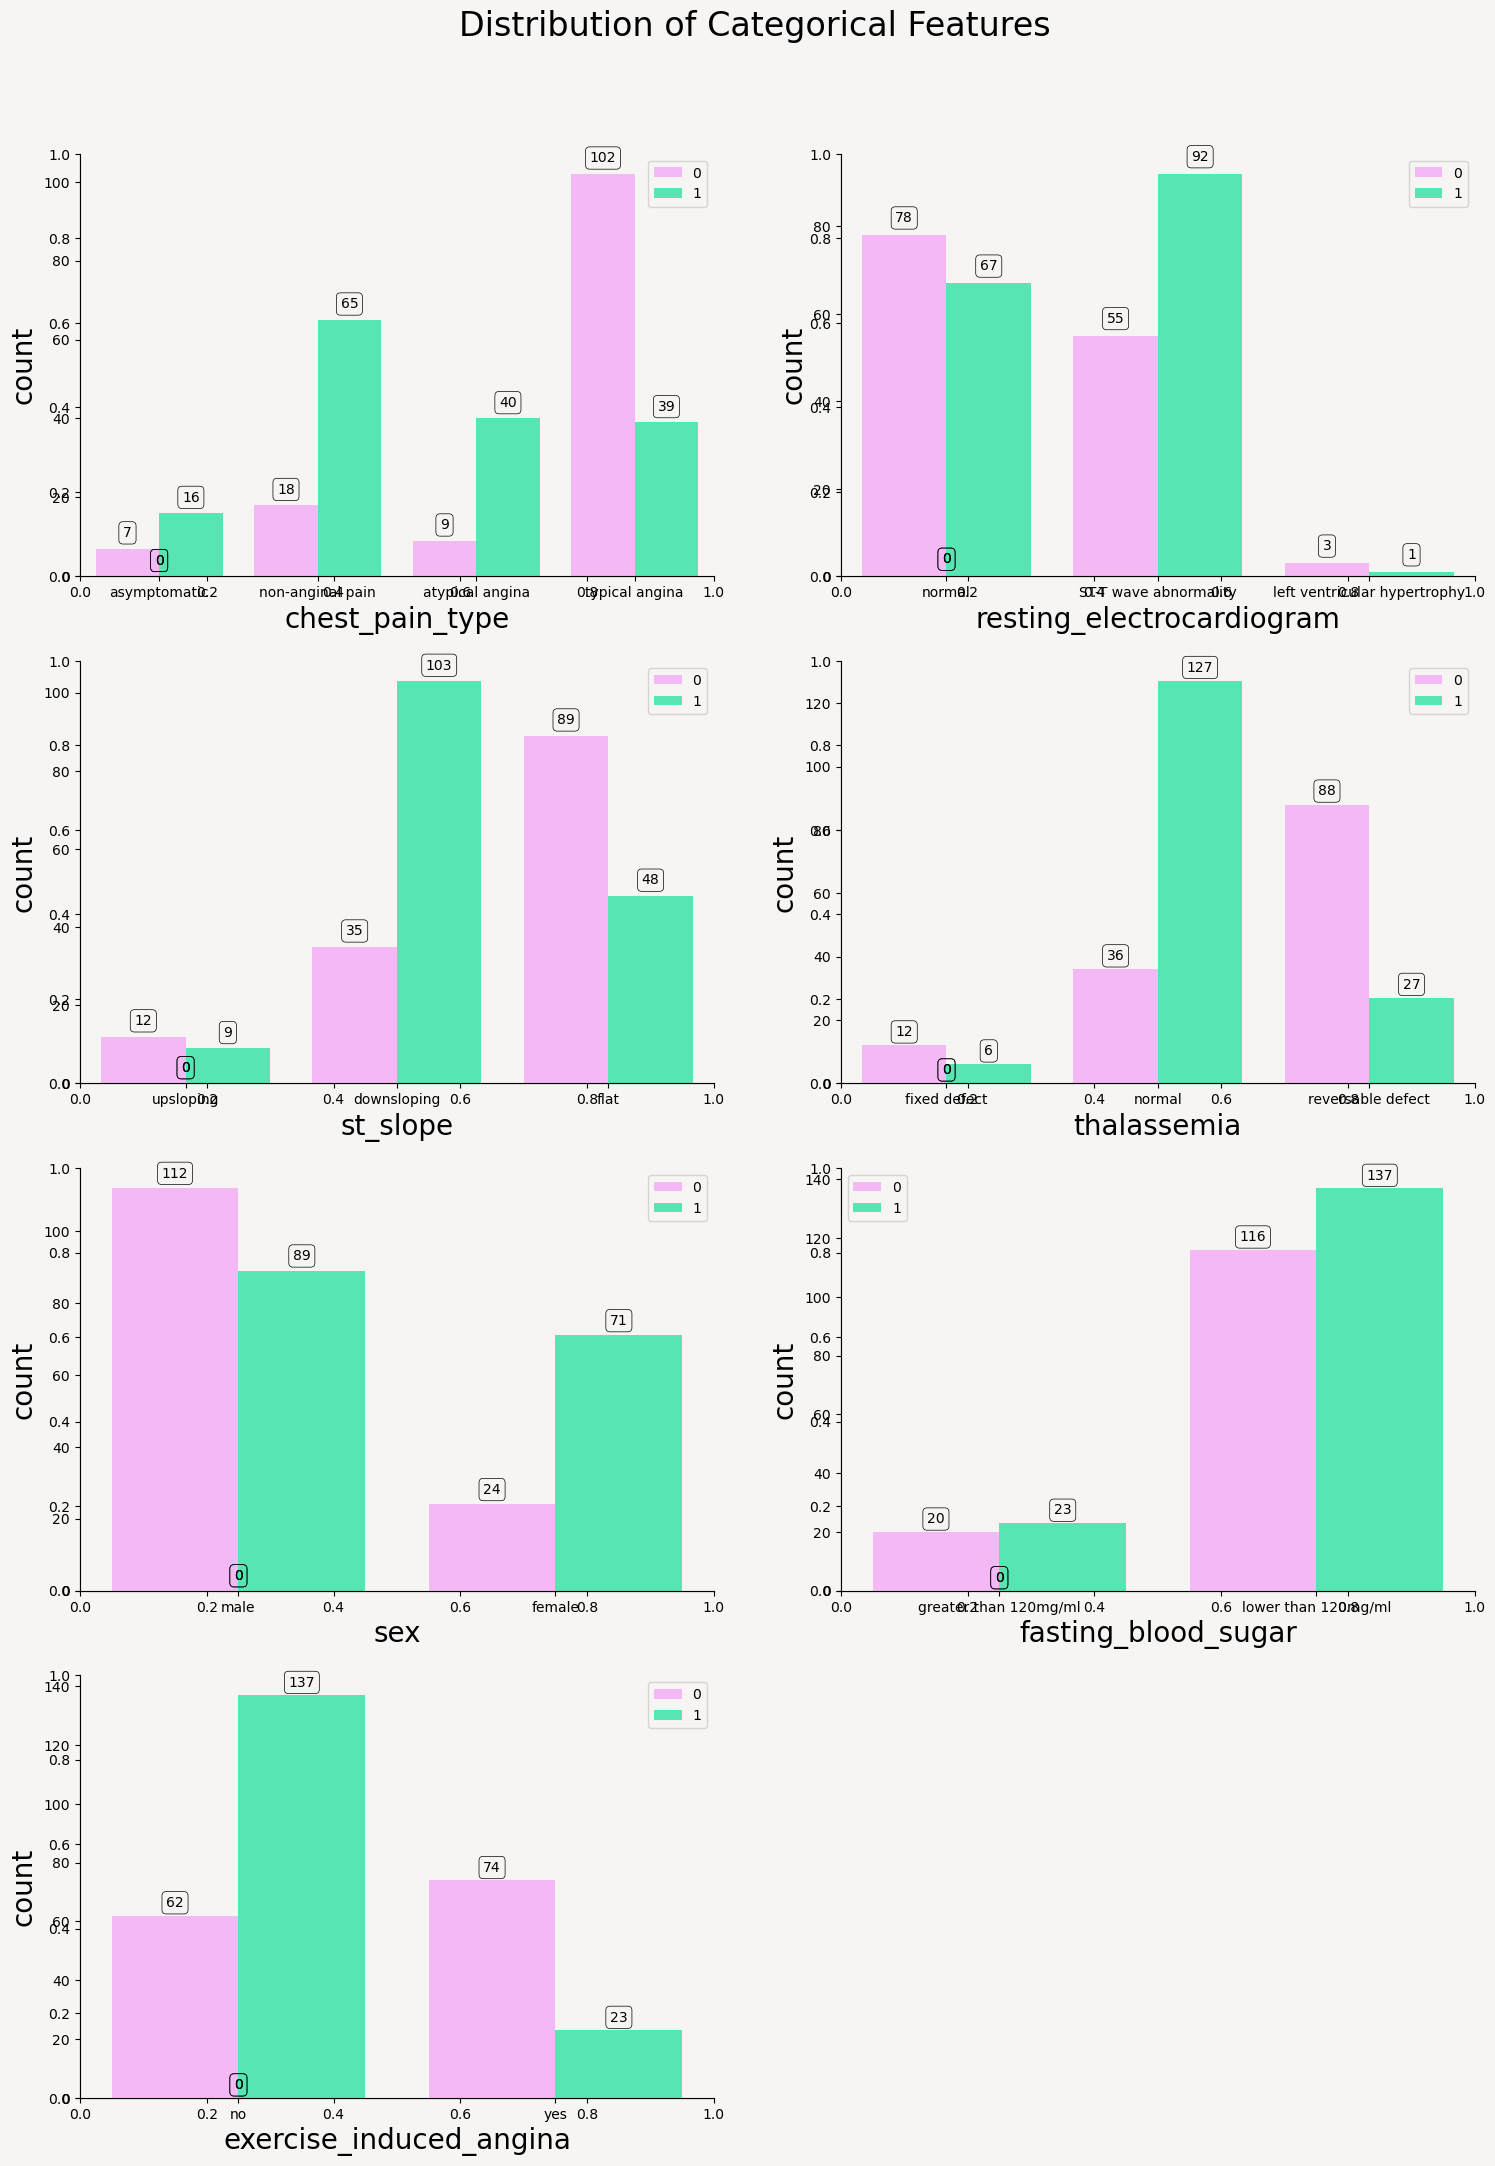

In [30]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

## 1.4 Correlation Heatmaps 
- Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods. Examples are pearson's correlation coefficient, point biserial correlation, cramers'V correlation and etc.

### 1.4.1 Pearson's correlation
- The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1. (ref. )

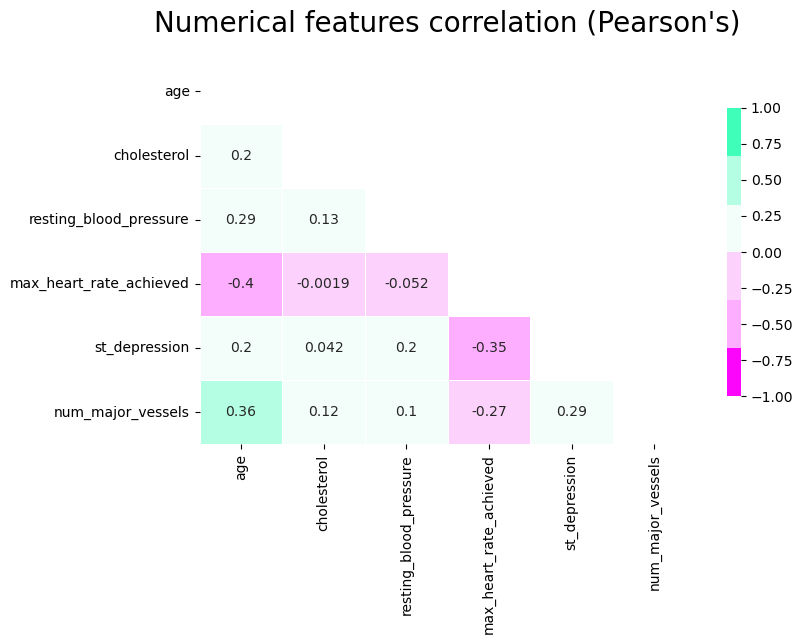

In [31]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

### 1.4.3 Cramer's V correlation
In statistics, Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946.


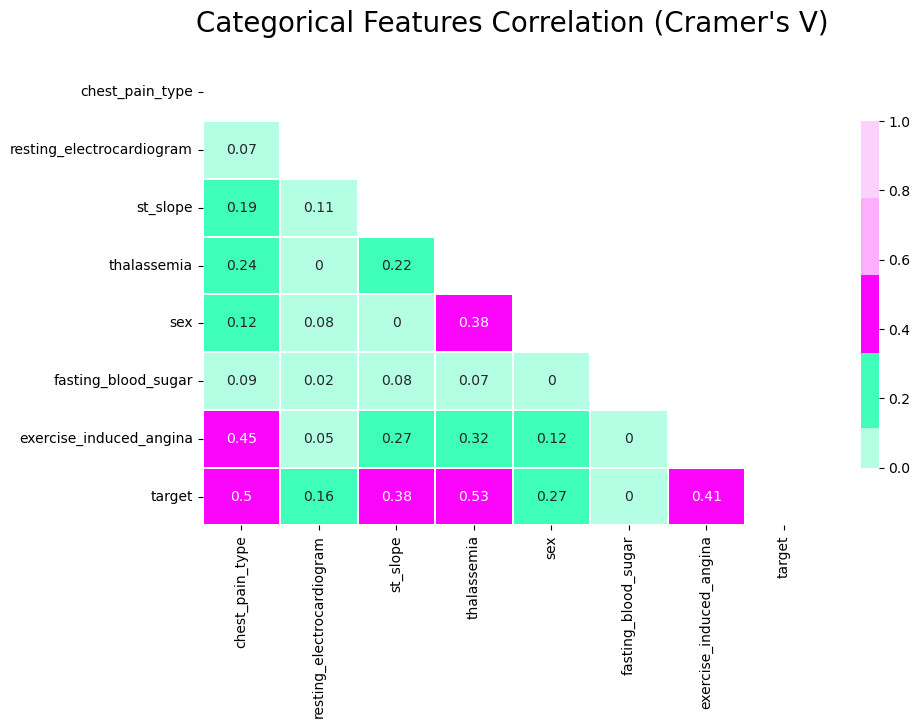

In [32]:
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette 
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

# 1.5 EDA Summary: 
- Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
- Data has no missing values
- Features (columns) data type:
* Six features are numerical
* The rest (seven features) are categorical variables
- Target variable is fairly balanced, 54% no-disease to 46% has-disease
- Correlations:
* Correlation between features is weak at best
* From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
* From the categorical features chest_pain_type, num_major_vessels, thalassemia, and exercise_induced_angina are better correlated with the target variable, thalassemia being the highest at 0.52.
* Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease.
- Takeaway: features that have higher predictive power could be, chest_pain_type, num_major_vessels, thalassemia, exercise_induced_angina
- max_heart_rate_achieved and st_depression. We will see which features will appear as imporatnt by the classification models.

# 2. Predictions 
- <b>Note</b> : We have only 297 case (after data cleaning) which is a very small amount of data to do any serious prediction. Therefore, any conclusion made must be taken with cautions. This notebook is merely an excercise on binary classification algorithms.

## 2.1 Scikit Learn Classifiers 
This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as Logistic Regression, Nearest Neighbors, Support Vectors, Nu SVC, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, Naive Bayes, Linear Discriminant Analysis, Quadratic Discriminant Analysis and Neural Net. Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
# !pip install shap
import shap 

In [41]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])
    
    data = data_encoded
    
    return data


def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)     

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.
    
    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
       
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        
        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1       
        
    plt.tight_layout() 
    plt.show()
    
    
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [43]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

### 2.1.1 Performance metric
- There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the 'appropriate' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, accuracy can be the right choice and in some other case a recall or precision could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

- Confusion matrix : A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class [wiki]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

### 2.1.2 Parameter Tuning (RandomizedSearch): LogisticRegression
So chosen our best classifier, the Logistic regression model. However, this was achieved with default parameters. The intuition is that we could further improve our model with tuned parameters. Let's see if could achieve that using the scikit-learn RandomizedSearch algorithm.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr, 
                         space, 
                         random_state=seed,
                         cv = 5, 
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': 0.2835648865872159, 'penalty': 'l2', 'solver': 'liblinear'}


In [46]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



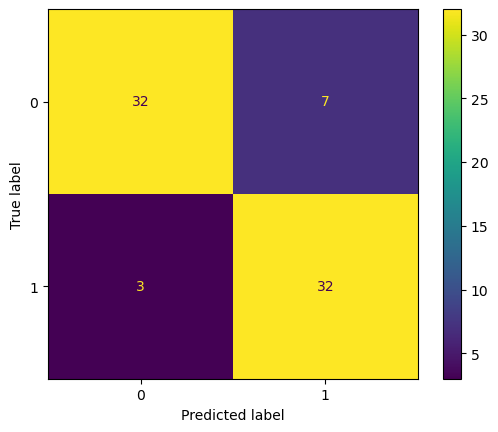

In [50]:
# Get predictions
y_pred = lr.predict(X_val)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

<b>Remark</b>: It turns out that our base model (default params) is not bad at all. Parameter tuning did not help to further increase the performance.

# 3. Concluding Remark
- At the start of this notebook, we laid out what we wanted to do with this project; to explore the heart disease dataset (EDA) and practice binary classification (modeling). In part one (EDA) we did explore the dataset, did a sanity check and removed some 'faulty' data and other pre-processing. We also tried to identify correlation between features and also with the target variable. In part two we practiced how to set-up binary classifiers; first starting with base models and finally arriving at our best model via hyper-parameter tuning. Some of the highlights are summarized below.

- Our best model happens to be LGBM classifier (tuned with randomizedSearch)
- According to both eli5 permutation importance and SHAP the three most important features of the model are num_major_vessels, chest_pain_type, and st_slope. These features are also among better correlated features from our EDA.
- Contrary to my intuition cholesterol happens to be not an important feature for the model (both eli5 and SHAP did not pick this feature as important).
- Although it is not shown in this notebook, varying the test/train ratio resulted in different performance metrics for the classifiers we have on our list. So if you change the ratio you might get different results.